# Generazione data set sintetico

In [1]:
# Vari import da usare
import numpy as np
import matplotlib.pyplot as plt

# Supporto per operazioni tra matrici e vettori
from numpy import matmul
from numpy import transpose
from numpy.linalg import inv
from numpy.linalg import pinv

In [2]:
def MakeSyntethicData(n=100, ifplot=False):
    np.random.seed(13)
    x1 = np.random.normal(2, 0.8, n)
    y1 = np.random.normal(6, 0.8, n)    
    
    m = 20
    x2 = np.random.normal(4, 0.5, max(n, n-m))
    y2 = np.random.normal(3, 0.5, max(n, n-m))

    if n > m:
        x2 = np.append(x2, np.random.normal(10, 0.5, 20))
        y2 = np.append(y2, np.random.normal(0, 0.5, 20))

    # Return data    
    X = []
    Y = []
    for x,y in zip(x1,y1):
        X.append((x,y))
        Y.append(0)  # 0 = blue

    for x,y in zip(x2,y2):
        X.append((x,y))
        Y.append(1)  # 1 = red

    if ifplot:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.scatter(x1, y1, alpha=0.5, c='blue')
        ax.scatter(x2, y2, alpha=0.5, c='red')
        ax.legend(('Blue=0', 'Red=1'))
        plt.show()
        
    return X, Y

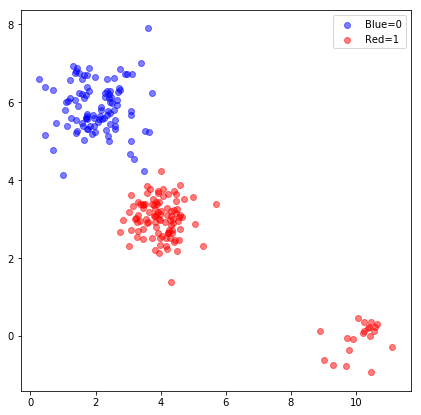

In [3]:
X,Y = MakeSyntethicData(100, True)

# Esercizio 1: Regressione Lineare
Si usino le [slide usate a lezione](http://www-dimat.unipv.it/~gualandi/programmazione2/slide_regressioni.pdf). 

Confrontare i coefficienti $w$ trovati dalla vostra soluzione con quelli che trova la classe `LinearRegression` della libreria `Scikit Learn`.

In [4]:
class RegressioneLineare(object):
    def fit(self, x, y):
        # DA COMPLETARE: SOLUZIONE EQUAZIONE NORMALE
        pass
    
    def predict(self, x):
        # DA COMPLETARE: USARE I PARAMETRI w
        pass

# Esercizio 2: Regressione Logistica
Si usino le [slide usate a lezione](http://www-dimat.unipv.it/~gualandi/programmazione2/slide_regressioni.pdf).

Confrontare i coefficienti $w$ trovati dalla vostra soluzione con quelli che trova la classe `LinearRegression` della libreria `Scikit Learn`.

In [5]:
class RegressioneLogistica(object):
    def fit(self, x, y):
        # DA COMPLETARE: METODO DI NEWTON RAPHSON SULLE SLIDES
        pass
    
    def predict(self, x):
        # DA COMPLETARE: USARE I PARAMETRI w
        pass